# Salary Predictions Based on Job Descriptions

This script is to examine a set of job postings with salaries and then predict salaries for a new set of job postings.
we are given 3 datasets.
1. train_features.csv: Each row represents metadata for an individual job posting.
2. train_salaries.csv: Each row associates a “jobId” with a “salary”.
3. test_features.csv: Similar to train_features.csv, each row represents metadata for an individual job posting.

we will first examine the data and then merge train_features and train_salaries datasets based on the unique feature
"jobId". Then we will perform the data preprocessing techniques and Exploratory data analysis to establish a baseline of our prediction model.

In [1]:
#import your libraries
import pandas as pd
import numpy as np
import colorama
from colorama import Fore, Back, Style
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import warnings
warnings.filterwarnings('ignore')
#etc

#your info here
__author__ = "pavankumar reddy"
__email__ = "pavankumarkanjula2@gmail.com"

### Loading the data into pandas dataframes

In [2]:
train_feature_df = pd.read_csv('data/train_features.csv')
train_target_df = pd.read_csv('data/train_salaries.csv')
test_feature_df = pd.read_csv('data/test_features.csv')

### Examine the data

In [3]:
def explain_str(explaination):
    """ A function to return colored string to seperate different information about a dataset

    Keyword Argumets:
    explaination -- a string eexplaining about the output

    Returns:
    a string with green color and stars on both sides
    """
    return Fore.GREEN + "************************ {0} ***********************".format(explaination) + Style.RESET_ALL 

def examine_df(data_frame):
    """ Shows basic information about the dataset

    Keyword Arguments:
    dset -- a dataframe which we are using in the project

    Returns -- prints the basic information about the dataset.
    """
    print(explain_str('dataframe shape'))
    print(data_frame.shape)
    print(explain_str('dataframe columns'))
    print(data_frame.columns)
    print(explain_str('dataframe head'))
    print(data_frame.head())
    print(explain_str('dataframe info'))
    print(data_frame.info())
        

In [42]:
examine_df(train_feature_df)

************************ dataframe shape ***********************
(1000000, 8)
************************ dataframe columns ***********************
Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis'],
      dtype='object')
************************ dataframe head ***********************
              jobId companyId         jobType       degree      major  \
0  JOB1362684407687    COMP37             CFO      MASTERS       MATH   
1  JOB1362684407688    COMP19             CEO  HIGH_SCHOOL       NONE   
2  JOB1362684407689    COMP52  VICE_PRESIDENT     DOCTORAL    PHYSICS   
3  JOB1362684407690    COMP38         MANAGER     DOCTORAL  CHEMISTRY   
4  JOB1362684407691     COMP7  VICE_PRESIDENT    BACHELORS    PHYSICS   

  industry  yearsExperience  milesFromMetropolis  
0   HEALTH               10                   83  
1      WEB                3                   73  
2   HEALTH               10                   38  
3    

In [39]:
examine_df(train_target_df)

(1000000, 2)
Index(['jobId', 'salary'], dtype='object')
************************ dataframe head ***********************
              jobId  salary
0  JOB1362684407687     130
1  JOB1362684407688     101
2  JOB1362684407689     137
3  JOB1362684407690     142
4  JOB1362684407691     163
************************ dataframe info ***********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
jobId     1000000 non-null object
salary    1000000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.3+ MB
None


In [43]:
examine_df(test_feature_df)

************************ dataframe shape ***********************
(1000000, 8)
************************ dataframe columns ***********************
Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis'],
      dtype='object')
************************ dataframe head ***********************
              jobId companyId  jobType       degree    major industry  \
0  JOB1362685407687    COMP33  MANAGER  HIGH_SCHOOL     NONE   HEALTH   
1  JOB1362685407688    COMP13   JUNIOR         NONE     NONE     AUTO   
2  JOB1362685407689    COMP10      CTO      MASTERS  BIOLOGY   HEALTH   
3  JOB1362685407690    COMP21  MANAGER  HIGH_SCHOOL     NONE      OIL   
4  JOB1362685407691    COMP36   JUNIOR     DOCTORAL  BIOLOGY      OIL   

   yearsExperience  milesFromMetropolis  
0               22                   73  
1               20                   47  
2               17                    9  
3               14                   96  

In [49]:
numeric_cols = train_feature_df._get_numeric_data().columns
categorical_cols = [x for x in train_feature_df.columns if x not in numeric_cols]
print("Numerical features -- {0}".format(numeric_cols))
 
print("Categorical features -- {0}".format(categorical_cols))

Numerical features -- Index(['yearsExperience', 'milesFromMetropolis'], dtype='object')
Categorical features -- ['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry']


### Cleaning the data 

In [2]:
#look for duplicate data, invalid data (e.g. salaries <=0), or corrupt data and remove it 

In [60]:
def check_missing(df):
    """This function checks for missing data in a given dataframe.
    
    Keyword Arguments:
    df -- dataframe in which we want to check for missing values.
    
    Returns:
    returns the count of missing values in each column of the dataframe.
    """
    return df.isnull().sum()

check_missing(train_feature_df)

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64

In [61]:
check_missing(test_feature_df)

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64

In [62]:
check_missing(train_target_df)

jobId     0
salary    0
dtype: int64

#### There are no any missing values in the given datasets.

In [71]:
#Checking for duplicate records if any exists.

any(train_feature_df.duplicated())

False

In [72]:
any(train_target_df.duplicated())

False

In [73]:
any(test_feature_df.duplicated())

False

#### There are no any duplicate records in the data. 

### Merging features and targets into single dataframe

In [7]:
train_df = pd.merge(train_feature_df, train_target_df, on='jobId')

In [8]:
examine_df(train_df)

************************ dataframe shape ***********************
(1000000, 9)
************************ dataframe columns ***********************
Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis', 'salary'],
      dtype='object')
************************ dataframe head ***********************
              jobId companyId         jobType       degree      major  \
0  JOB1362684407687    COMP37             CFO      MASTERS       MATH   
1  JOB1362684407688    COMP19             CEO  HIGH_SCHOOL       NONE   
2  JOB1362684407689    COMP52  VICE_PRESIDENT     DOCTORAL    PHYSICS   
3  JOB1362684407690    COMP38         MANAGER     DOCTORAL  CHEMISTRY   
4  JOB1362684407691     COMP7  VICE_PRESIDENT    BACHELORS    PHYSICS   

  industry  yearsExperience  milesFromMetropolis  salary  
0   HEALTH               10                   83     130  
1      WEB                3                   73     101  
2   HEALTH            

### Detecting potential outliers if present.

In [96]:
# Detecting if any outliers are present in the data using IQR method.
def outliers_iqr(feature):
    print(feature.describe())
    quartile_1, quartile_3 = np.percentile(feature, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    print('The upper and lower bounds for suspected outliers are {} and {}.'.format(upper_bound, lower_bound))
    return np.where((feature > upper_bound) | (feature < lower_bound))

In [97]:
print(outliers_iqr(train_df['yearsExperience']))

count    1000000.000000
mean          11.992386
std            7.212391
min            0.000000
25%            6.000000
50%           12.000000
75%           18.000000
max           24.000000
Name: yearsExperience, dtype: float64
The upper and lower bounds for suspected outliers are 36.0 and -12.0.
(array([], dtype=int64),)


In [98]:
print(outliers_iqr(train_df['milesFromMetropolis']))

count    1000000.000000
mean          49.529260
std           28.877733
min            0.000000
25%           25.000000
50%           50.000000
75%           75.000000
max           99.000000
Name: milesFromMetropolis, dtype: float64
The upper and lower bounds for suspected outliers are 150.0 and -50.0.
(array([], dtype=int64),)


In [99]:
print(outliers_iqr(train_df['salary']))

count    1000000.000000
mean         116.061818
std           38.717936
min            0.000000
25%           88.000000
50%          114.000000
75%          141.000000
max          301.000000
Name: salary, dtype: float64
The upper and lower bounds for suspected outliers are 220.5 and 8.5.
(array([   266,    362,    560, ..., 999280, 999670, 999893]),)


In [100]:
# records for which salary is below the lower bound
train_df[train_df.salary < 8.5]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


In [101]:
#records for which salary is above the upper bound
train_df.loc[train_df.salary > 222.5, 'jobType'].value_counts()

CEO               2893
CFO               1308
CTO               1298
VICE_PRESIDENT     520
MANAGER            188
SENIOR              50
JUNIOR              16
Name: jobType, dtype: int64

In [103]:
train_df[(train_df.salary > 222.5) & (train_df.jobType == 'JUNIOR')]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246
31355,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225
100042,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248
160333,JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223
303778,JOB1362684711465,COMP51,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226
348354,JOB1362684756041,COMP56,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226
500739,JOB1362684908426,COMP40,JUNIOR,DOCTORAL,ENGINEERING,OIL,21,0,227
627534,JOB1362685035221,COMP5,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,29,230
645555,JOB1362685053242,COMP36,JUNIOR,DOCTORAL,BUSINESS,FINANCE,24,1,225


If we check at the outliers below lower bound, salary is zero for all of the jobs. But the job type doesn't seems to be a voluntary job either for any of them. Hence, we can consider them as missing data and will remove them.

Now comes to the outliers above upper bound, Although most of the high salaries are for C-level executives and senior managerial roles, few of the Junior roles are also getting paid high salaries. If we check at the industry what they work in, we can agree this as OIL and FINANCE industries are known for high paying jobs. So we will not remove any of these rows.

In [171]:
train_df = train_df[train_df['salary'] > 0]

### ---- 4 Explore the data (EDA) ----

In [3]:
#summarize each feature variable
#summarize the target variable
#look for correlation between each feature and the target
#look for correlation between features

#### Frequency counts for catogerical variables

In [172]:
def freq_counts(df):
    """ A function to print frequency counts for all the categorical features in a dataframe
    
    Keyword Arguments : 
    df -- dataframe for which we want to get frequency counts of catogerical variables
    
    """
    numeric_cols = df._get_numeric_data().columns
    categorical_cols = [x for x in df.columns if x not in numeric_cols]
    for feature in categorical_cols:
        print(explain_str("Frequency counts for {0}".format(feature)))
        print(df[feature].value_counts(dropna=False))

In [120]:
freq_counts(train_df)

************************ Frequency counts for jobId ***********************
JOB1362685213196    1
JOB1362684831665    1
JOB1362684510379    1
JOB1362684475679    1
JOB1362685097169    1
JOB1362684834669    1
JOB1362685214927    1
JOB1362684868854    1
JOB1362684686012    1
JOB1362684793401    1
JOB1362684474513    1
JOB1362684574902    1
JOB1362684493912    1
JOB1362685215829    1
JOB1362684574122    1
JOB1362685341435    1
JOB1362685059604    1
JOB1362685138694    1
JOB1362684444333    1
JOB1362684605362    1
JOB1362684795213    1
JOB1362685319507    1
JOB1362684854281    1
JOB1362684604272    1
JOB1362685406410    1
JOB1362684480370    1
JOB1362685265366    1
JOB1362685226430    1
JOB1362684540398    1
JOB1362685379753    1
                   ..
JOB1362684560330    1
JOB1362684755618    1
JOB1362684434250    1
JOB1362685055296    1
JOB1362685071727    1
JOB1362685392464    1
JOB1362684698120    1
JOB1362684770216    1
JOB1362685165915    1
JOB1362684585322    1
JOB1362684954836    1


In [173]:
def df_features_summary(df):
    """This function prints out the summary statistics of numerical and categorical features seperately.
    
    Keyword Arguments
    df -- Dataframe for which we need to print the summary statistics.
    
    """
    numeric_cols = df._get_numeric_data().columns
    categorical_cols = [x for x in df.columns if x not in numeric_cols]
    print(explain_str("summary statistics of numerical features"))
    print(df[numeric_cols].describe())
    print(explain_str("summary statistics of categorical features"))
    print(df[categorical_cols].describe())
    

In [174]:
df_features_summary(train_df)

************************ summary statistics of numerical features ***********************
       yearsExperience  milesFromMetropolis         salary
count    999995.000000        999995.000000  999995.000000
mean         11.992407            49.529381     116.062398
std           7.212390            28.877721      38.717163
min           0.000000             0.000000      17.000000
25%           6.000000            25.000000      88.000000
50%          12.000000            50.000000     114.000000
75%          18.000000            75.000000     141.000000
max          24.000000            99.000000     301.000000
************************ summary statistics of categorical features ***********************
                   jobId companyId jobType       degree   major industry
count             999995    999995  999995       999995  999995   999995
unique            999995        63       8            5       9        7
top     JOB1362685213196    COMP39  SENIOR  HIGH_SCHOOL    NONE     

### Visualizing the levels of categorical features

Text(0.5,1,'industry')

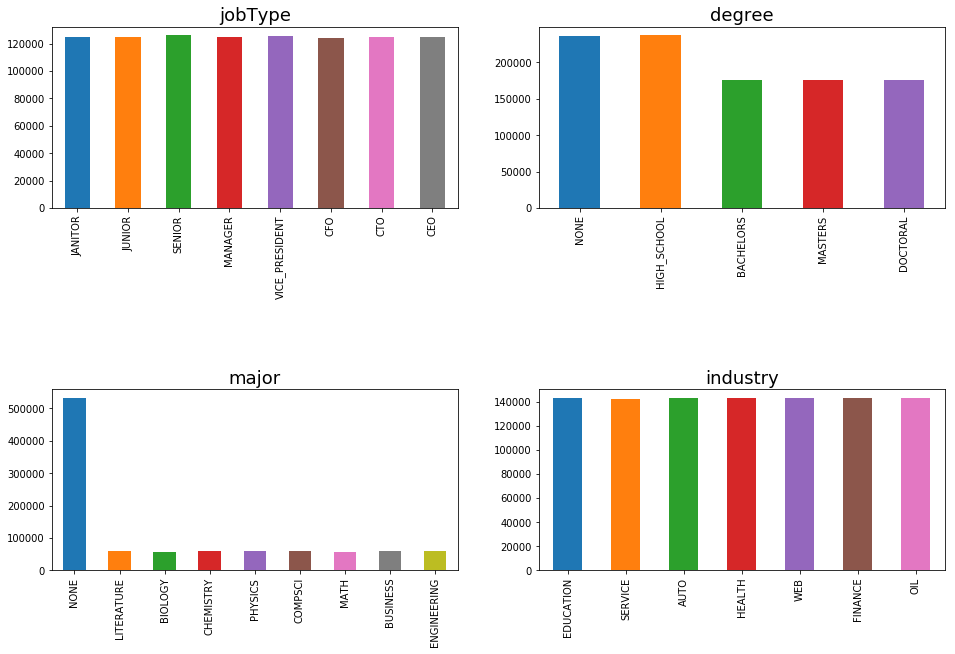

In [175]:
fig, axarr = plt.subplots(2, 2, figsize=(16, 10))
fig.subplots_adjust(hspace = 1)
train_df['jobType'].value_counts().sort_index().plot.bar(ax=axarr[0][0])
axarr[0][0].set_title("jobType", fontsize=18)
train_df['degree'].value_counts().sort_index().plot.bar(ax=axarr[0][1])
axarr[0][1].set_title("degree", fontsize=18)
train_df['major'].value_counts().sort_index().plot.bar(ax=axarr[1][0])
axarr[1][0].set_title("major", fontsize=18)
train_df['industry'].value_counts().sort_index().plot.bar(ax=axarr[1][1])
axarr[1][1].set_title("industry", fontsize=18)

### Visualizing the target variable('salary')

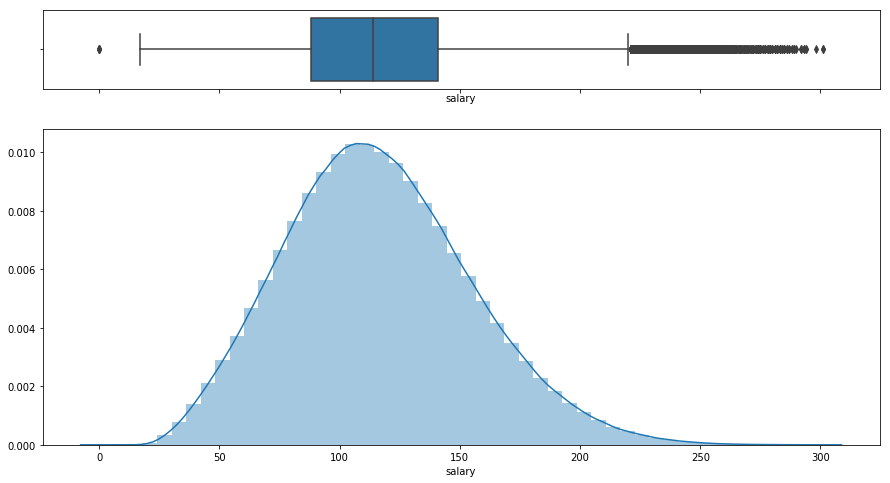

In [10]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize = (15,8), gridspec_kw={"height_ratios": (.2, .8)})
sns.boxplot(train_df["salary"], ax=ax_box)
sns.distplot(train_df["salary"], ax=ax_hist)


### Visualizing the relation between training features and target variable.

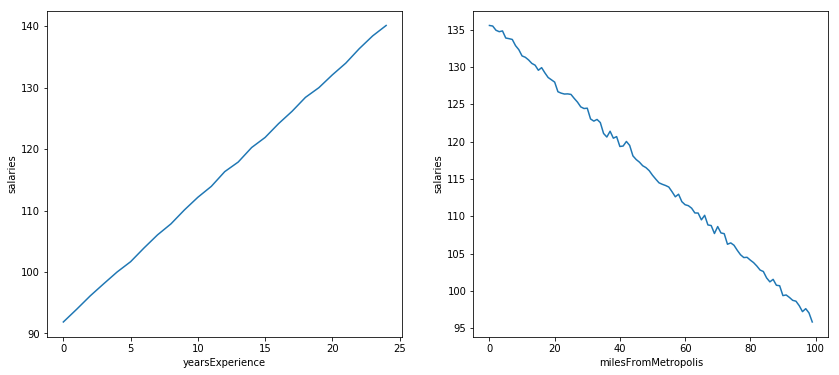

In [9]:
numeric_features = ['yearsExperience','milesFromMetropolis']
plt.figure(figsize = (14, 6))
for i in range(2):
    plt.subplot(1,2,i+1)
    mean = train_df.groupby(numeric_features[i])['salary'].mean()
    mean.plot()
    plt.ylabel('salaries')

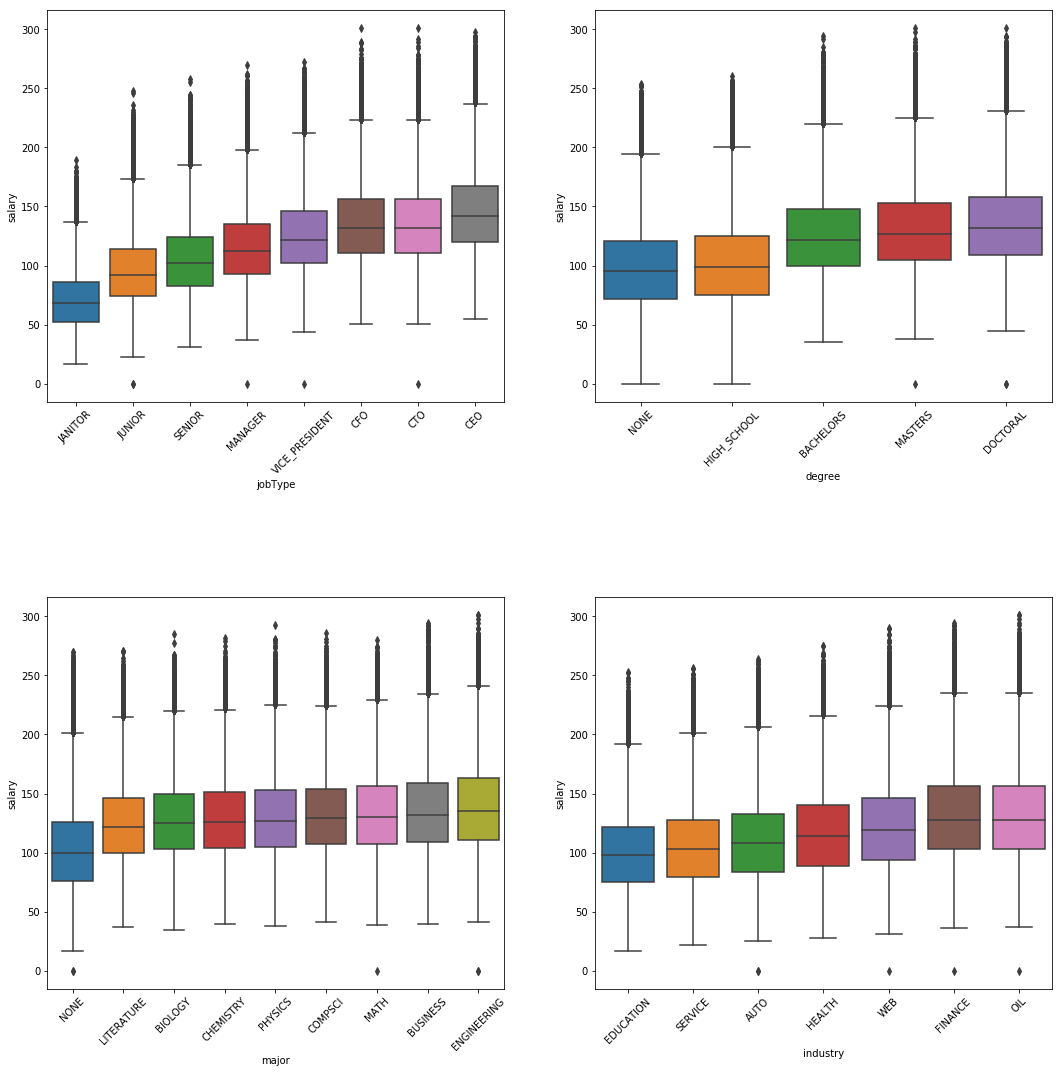

In [167]:
categorical_features = ['jobType','degree','major','industry']
plt.figure(figsize= (18,18))
for i in range(len(categorical_features)):
    plt.subplot(2,2,i+1)
    mean = train_df.groupby(categorical_features[i])['salary'].mean()
    train_df[categorical_features[i]] = train_df[categorical_features[i]].astype('category')
    levels = mean.sort_values().index.tolist()
    train_df[categorical_features[i]].cat.reorder_categories(levels, inplace=True)
    sns.boxplot(x =categorical_features[i] , y = 'salary', data=train_df)
    plt.xticks(rotation=45)
plt.subplots_adjust(hspace = 0.5)


Observations:
* Considering the plot between milesFromMetrpolis and salaries, we can say the salary is negatively correlated with th distance from Metropolis.
* Work experience is positively correlated with salary.
* AS the job type changes from Janitor level to C-level executive positions, the salary is also increasing.
* In general, more advanced degrees are paying high salaries.
* People with Engineering or Business majors are getting high salaries than others.
* Finance and Oil industries have high salary jobs.

### Visualization of correlation heatmap of the features

In [17]:
def encode_label(df, col):
    #encode the categories using mean salary for each category to replace label
    cat_dict ={}
    cats = df[col].cat.categories.tolist()
    for cat in cats:
        cat_dict[cat] = train_df[train_df[col] == cat]['salary'].mean()   
    df[col] = df[col].map(cat_dict)

In [38]:
for col in train_df.columns:
    if train_df[col].dtype.name == "object":
        train_df[col].dtype.name == "category"
        encode_label(train_df, col)

In [73]:
def heatMap(df, mirror):

    # Create Correlation df
    corr = df.corr()
    # Plot figsize
    fig, ax = plt.subplots(figsize=(12, 10))
    # Generate Color Map
    #colormap = sns.diverging_palette(240, 10, as_cmap=True)
   
    if mirror == True:
       #Generate Heat Map, allow annotations and place floats in map
       sns.heatmap(corr, cmap='Greens', annot=True)
       #Apply xticks
       plt.xticks(range(len(corr.columns)), corr.columns);
       plt.xticks(rotation=45)
       #Apply yticks
       plt.yticks(range(len(corr.columns)), corr.columns)
       #show plot

    else:
       # Drop self-correlations
       dropSelf = np.zeros_like(corr)
       dropSelf[np.triu_indices_from(dropSelf)] = True# Generate Color Map
       #colormap = sns.diverging_palette(220, 10, as_cmap=True)
       # Generate Heat Map, allow annotations and place floats in map
       sns.heatmap(corr, cmap='YlOrBr', annot=True, mask=dropSelf)
       # Apply xticks
       plt.xticks(range(len(corr.columns)), corr.columns);
       plt.xticks(rotation=45)
       # Apply yticks
       plt.yticks(range(len(corr.columns)), corr.columns)
       
    # show plot
    plt.show()

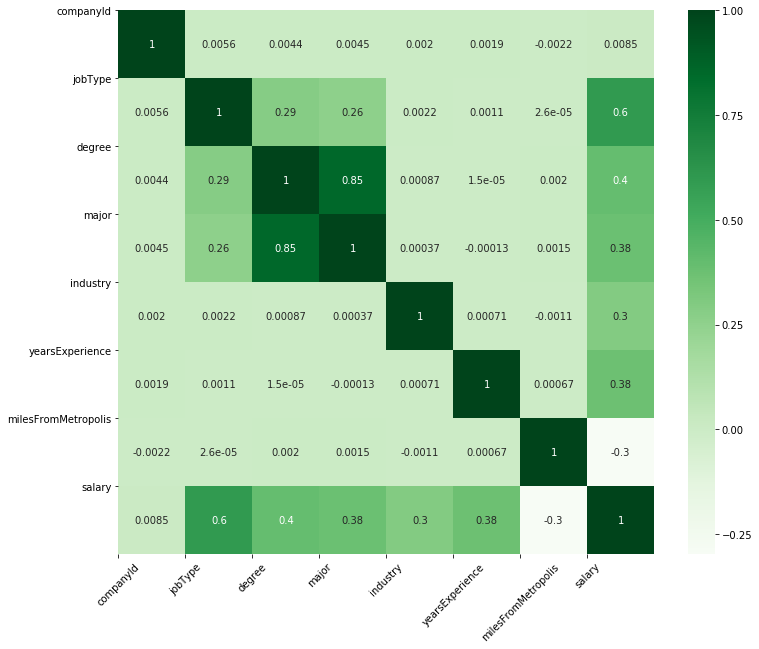

In [74]:
heatMap(train_df, mirror = True)

* CompanyId has the least correlation with any of the features.
* jobType is strongly correlated with salary follwed by the degree and major.
* Major and degree have highest correlation out of all the features.

### ---- 5 Establish a baseline ----

In [5]:
#select a reasonable metric (MSE in this case)
#create an extremely simple model and measure its efficacy
#e.g. use "average salary" for each industry as your model and then measure MSE
#during 5-fold cross-validation

### ---- 6 Hypothesize solution ----

In [ ]:
#brainstorm 3 models that you think may improve results over the baseline model based
#on your 

Brainstorm 3 models that you think may improve results over the baseline model based on your EDA and explain why they're reasonable solutions here.

Also write down any new features that you think you should try adding to the model based on your EDA, e.g. interaction variables, summary statistics for each group, etc

## Part 3 - DEVELOP

You will cycle through creating features, tuning models, and training/validing models (steps 7-9) until you've reached your efficacy goal

#### Your metric will be MSE and your goal is:
 - <360 for entry-level data science roles
 - <320 for senior data science roles

### ---- 7 Engineer features  ----

In [ ]:
#make sure that data is ready for modeling
#create any new features needed to potentially enhance model

### ---- 8 Create models ----

In [15]:
#create and tune the models that you brainstormed during part 2

### ---- 9 Test models ----

In [1]:
#do 5-fold cross validation on models and measure MSE

### ---- 10 Select best model  ----

In [ ]:
#select the model with the lowest error as your "prodcuction" model

## Part 4 - DEPLOY

### ---- 11 Automate pipeline ----

In [ ]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

### ---- 12 Deploy solution ----

In [16]:
#save your prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders

### ---- 13 Measure efficacy ----

We'll skip this step since we don't have the outcomes for the test data